# PROJECT: Client: ABC Tech 

## TASKS
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so
that they can take preventive measures or fix the problem before
it surfaces.
2. Forecast the incident volume in different fields , quarterly and
annual. So that they can be better prepared with resources and
technology planning.
3. Auto tag the tickets with right priorities and right departments so
that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure /
misconfiguration of ITSM assets.

## BUSINESS CASE;


ABC Tech is an mid-size organisation operation in IT-enabled business
segment over a decade. On an average ABC Tech receives 22-25k IT
incidents/tickets , which were handled to best practice ITIL framework
with incident management , problem management, change management
and configuration management processes. These ITIL practices attained
matured process level and a recent audit confirmed that further
improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident
management process as recent customer survey results shows that
incident management is rated as poor.

In [1]:
#!pip install pymysql
#!pip install mysql-connector

In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('ABC.csv')
data

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\1459786184.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('ABC.csv')


,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [4]:
data.columns

Index(['Unnamed: 0', 'CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID',
       'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'KB_number', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

## Domain Analysis

- 1.Configuration Item Name : A Configuration Item (CI) is a component or asset within an IT system that needs to be managed, tracked, and controlled. Examples of CIs might include hardware devices, software applications, network components, or even people and processes.

- 2.CI_Cat : In ITSM refers to the category or classification of a specific Configuration Item. The category might be used to group similar CIs together for easier management and tracking, or to help identify the type of CI and its function within the IT environment.

- 3.CI_Subcat : This column refers to the CI subcategory, which is a further classification of the CI within its category. Examples of CI subcategories include server, desktop, laptop, operating system, and application.

- 4.WBS : This column refers to the Work Breakdown Structure (WBS), which is a hierarchical decomposition of the project into smaller, more manageable components. The WBS is used to organize and track the work required to complete the project.

- 5.Incident_ID : This column refers to the unique identification number assigned to the incident. This number is used to track and manage the incident throughout its lifecycle.

- 6.Status : This column refers to the current status of the incident. Examples of status include new, in progress, resolved, and closed.

- 7.Impact : This column refers to the degree of impact the incident has on the business. The impact is usually measured in terms of the number of users affected and the level of disruption to business operations.

- 8.Urgency : This column refers to the degree of urgency required to resolve the incident. Urgency is usually measured in terms of the business impact and the severity of the issue.

- 9.Priority : This column refers to the priority level assigned to the incident. The priority is usually determined based on the impact and urgency of the incident, as well as other factors such as customer requirements and contractual obligations.

- 10.number_cnt : This column refers to the number of times the incident has been logged or recorded.

- 11.Category : This column refers to the category of the incident, which is a way to classify the type of issue being reported. This can include categories such as hardware, software, network, user, and more.

- 12.KB_number : This column refers to the knowledge base (KB) article number associated with the incident. A knowledge base is a centralized repository of information that contains solutions to common issues and troubleshooting guides.

- 13.Alert_Status : This column refers to the status of any alerts associated with the incident. Alerts are notifications generated by a monitoring system that detect and report on events or issues.

- 14.No_of_Reassignments : This column refers to the number of times the incident has been reassigned to a different team or individual for further investigation or resolution.

- 15.Open_Time : This column refers to the date and time when the incident was initially opened or reported.

- 16.Reopen_Time : This column refers to the date and time when the incident was reopened after being closed previously.

- 17.Resolved_Time : This column refers to the date and time when the incident was resolved, meaning the issue has been identified and a solution has been implemented.

- 18.Close_Time : This column refers to the date and time when the incident was closed, meaning the issue has been fully resolved and no further action is required.

- 19.Handle_Time_hrs : This column refers to the total time in hours that was spent working on the incident. This includes the time spent investigating, troubleshooting, and resolving the issue.

- 20.Closure_Code : This column refers to the code or reason used to close the incident. This can include codes such as "resolved," "closed by user," "no fault found," and more.

- 21.No_of_Related_Interactions : This column refers to the number of related interactions associated with the incident. Related interactions can include things like phone calls, emails, or chat messages related to the incident.

- 22.Related_Interaction : This column refers to the specific interaction or communication associated with the incident.

- 23.No_of_Related_Incidents : This column refers to the number of related incidents associated with the incident being reported.

- 24.No_of_Related_Changes : This column refers to the number of related changes associated with the incident being reported. Changes can include things like updates to software, hardware upgrades, or modifications to IT infrastructure.

- 25.Related_Change : This column refers to the specific change or modification associated with the incident being reported.

## Basic Checks

In [5]:
data.isnull().sum()

Unnamed: 0                        0
CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [6]:
data

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [7]:
data.head(5)

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [8]:
data.describe()

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,46606.00000,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,23302.50000,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,13454.13766,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,0.00000,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,11651.25000,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,23302.50000,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,34953.75000,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,46605.00000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [9]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [10]:
data.shape

(46606, 26)

In [11]:
data.Priority.value_counts()

4.0    22717
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: Priority, dtype: int64

## EDA

### UNIVARIATE ANALYSIS

In [12]:
a=data[['CI_Cat','CI_Subcat','Impact','Urgency','Category','Status','Closure_Code']]

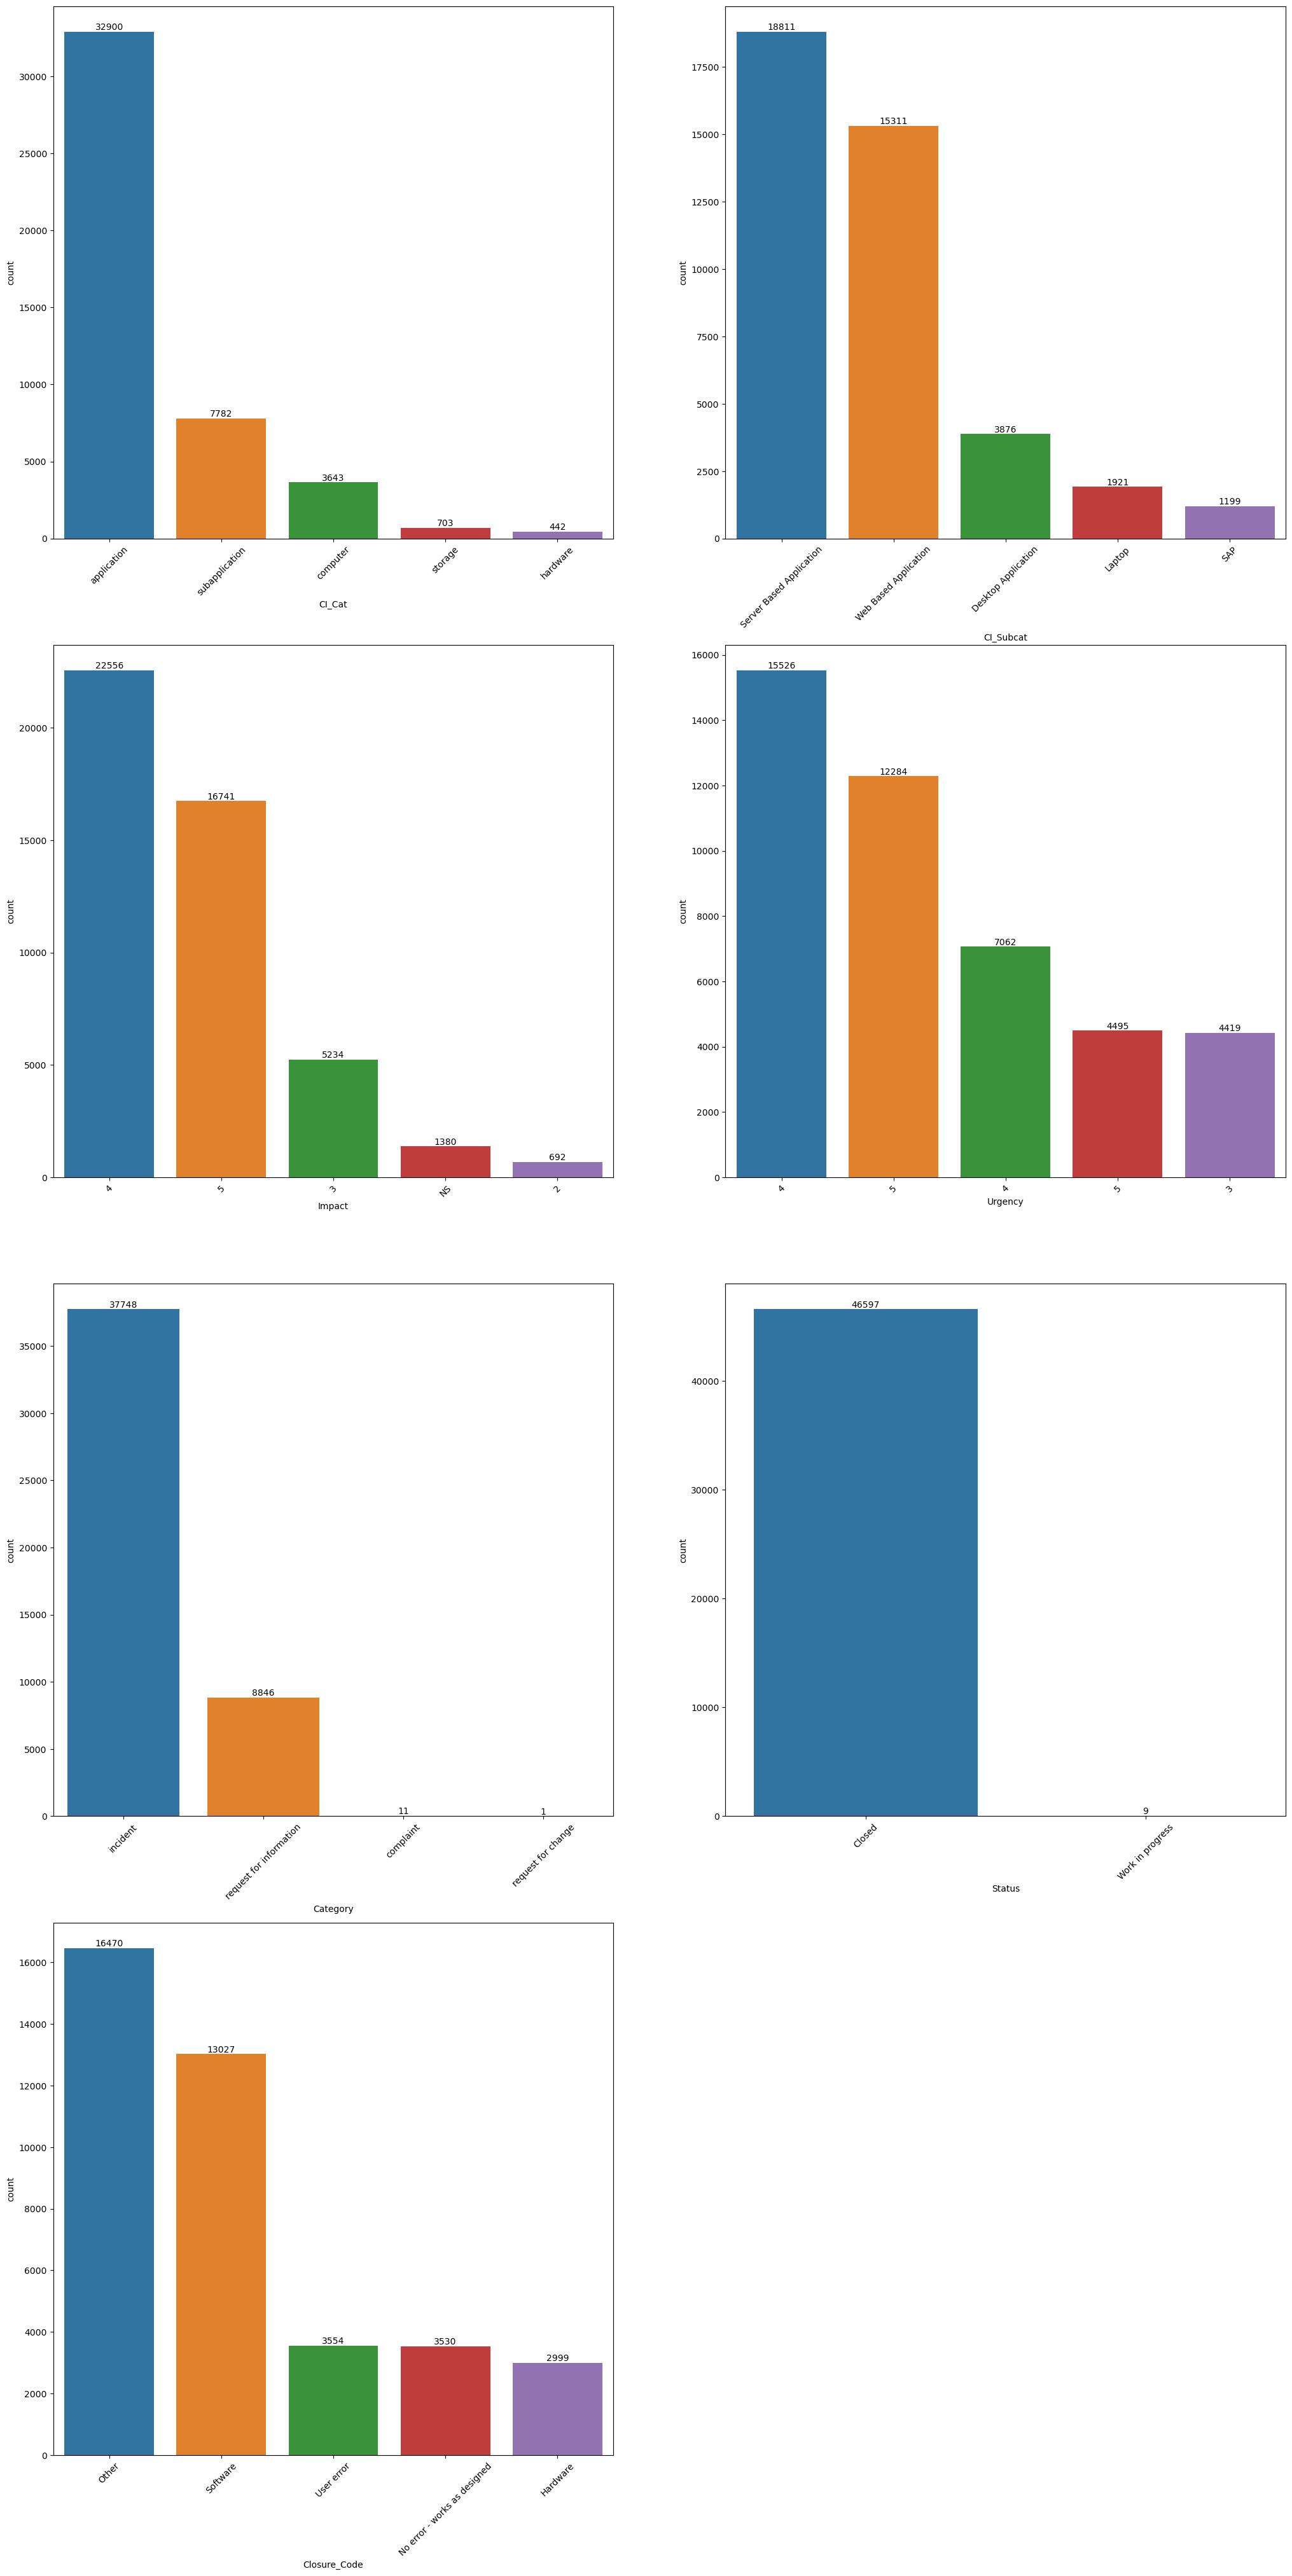

In [13]:
plt.figure(figsize=(25,50))
plotnumber=1
for i in a:
  top_categories = data[i].value_counts().head(5)
  ax = plt.subplot(4,2,plotnumber)
  sns.countplot(data=data, x=i, order=top_categories.index, ax=ax)
  labels = ax.get_xticklabels()
  ax.set_xticklabels(labels, rotation=45)
  for j, count in enumerate(top_categories):
    ax.annotate(str(count), xy=(j, count), ha='center', va='bottom')
  plotnumber+=1
plt.show()

1. In **CI_Cat** feature,majority Category is application which is of **32900** records.
2. In **CI_Subcat** feature, majority Sub Category is Server BAsed Application which is having **18811** records.
3. **Impact** feature is having maximum of 4 rating for **22556** records.
4. **Urgency** feature is having maximum of 4 rating for **15526** records.
5. There are 4 category, out of that **Incident** category are having **37748** records.
6. Around 99% observations are Closed in **Status** feature.
7. Majority of **Closure_Code** are Others and **13027** records are having Software as Closure_Code.

### Business Case 1: Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

- Data Processing / Data Munging


- ##-CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.

In [14]:
data.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [15]:
data.CI_Subcat.value_counts()

Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

In [16]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [17]:
data.CI_Cat.value_counts()

application       33011
subapplication     7787
computer           3643
storage             917
hardware            915
software            333
Name: CI_Cat, dtype: int64

In [18]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [19]:
data.CI_Subcat.value_counts()

Server Based Application    19208
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: CI_Subcat, dtype: int64

In [20]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

**Feature Selection**

- Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [21]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [22]:
X.head(5)

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

## Model Creation

In [24]:
# Splitting the data into test and train for calculating accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [25]:
# Standardization technique
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train.shape

(32624, 4)

In [27]:
X_test.shape

(13982, 4)

## Model Evaluation

In [28]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [29]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [30]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.747604062365899
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.55      0.31      0.39      1581
         4.0       0.72      0.89      0.80      7254
         5.0       0.87      0.68      0.76      4936

    accuracy                           0.75     13982
   macro avg       0.53      0.51      0.51     13982
weighted avg       0.75      0.75      0.74     13982



C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
confusion_matrix(y_test,y_predict_svm)

array([[   0,    0,    0,    1,    0],
       [   0,  137,    8,   56,    9],
       [   0,   36,  486,  958,  101],
       [   0,   78,  314, 6477,  385],
       [   0,   10,   79, 1494, 3353]], dtype=int64)

In [32]:
##2. Decision Tree

In [33]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [35]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.8168359319124588
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.69      0.59       210
         3.0       0.66      0.63      0.65      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0],
       [   0,  144,    6,   43,   17],
       [   0,   42,  998,  420,  121],
       [   0,   80,  458, 6325,  391],
       [   0,   12,   51,  919, 3954]], dtype=int64)

In [37]:
##3. Random Forest

In [38]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [39]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [40]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8166928908596768
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.67      0.59       210
         3.0       0.66      0.62      0.64      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    1,    0],
       [   0,  141,    9,   43,   17],
       [   0,   40,  987,  431,  123],
       [   0,   78,  451, 6332,  393],
       [   0,   11,   50,  916, 3959]], dtype=int64)

In [42]:
##4. K-Nearest Neighbor

In [43]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [44]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [45]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8116149334859104
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.66      0.58       210
         3.0       0.63      0.63      0.63      1581
         4.0       0.81      0.88      0.84      7254
         5.0       0.90      0.78      0.83      4936

    accuracy                           0.81     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.81      0.81     13982



C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    0,    0,    1,    0],
       [   0,  138,    9,   45,   18],
       [   0,   37,  991,  429,  124],
       [   0,   79,  487, 6382,  306],
       [   0,   10,   79, 1010, 3837]], dtype=int64)

In [47]:
##5. Artificial Neural Network

In [48]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,y_train)

C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [49]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [50]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7702760692318695
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.62      0.38      0.47      1581
         4.0       0.75      0.89      0.81      7254
         5.0       0.87      0.72      0.79      4936

    accuracy                           0.77     13982
   macro avg       0.55      0.53      0.53     13982
weighted avg       0.77      0.77      0.76     13982



C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindushree\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
confusion_matrix(y_test,y_predict_mlp)

array([[   0,    0,    0,    1,    0],
       [   0,  137,    6,   55,   12],
       [   0,   36,  608,  817,  120],
       [   0,   78,  328, 6462,  386],
       [   0,   10,   40, 1323, 3563]], dtype=int64)

In [52]:
data3= data.copy()

## Accuray Report:

1.SVM: 0.74

2.Decission Tree: 0.81

3.Random Forest: 0.81

4.KNN: 0.80

5.ANN: 0.76

**From the above Accuracy report ,we can conclude that Decision Tree and Random Forest algorithms are best suited Models for the given Business Case.**

## Business Case 2: Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

In [53]:
data=pd.read_csv('ABC.csv')
data

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\1459786184.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('ABC.csv')


,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [54]:
data.Category.value_counts()

incident                   37748
request for information     8846
complaint                     11
request for change             1
Name: Category, dtype: int64

In [55]:
data.shape

(46606, 26)

- Selecting the columns required for time series analysis

In [56]:
data1=data[['Category','Open_Time']]

In [57]:
data1

,Category,Open_Time
0,incident,05-02-2012 13:32
1,incident,12-03-2012 15:44
2,request for information,29-03-2012 12:36
3,incident,17-07-2012 11:49
4,incident,10-08-2012 11:01
...,...,...
46601,incident,31-03-2014 16:23
46602,incident,31-03-2014 15:03
46603,incident,31-03-2014 15:28
46604,incident,31-03-2014 15:35


In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   46606 non-null  object
 1   Open_Time  46606 non-null  object
dtypes: object(2)
memory usage: 728.3+ KB


### Converting Object datatype to datetime dtype for Open_time column

In [59]:
data1['Open_Time']=data1['Open_Time'].apply(pd.to_datetime)

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\187837225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Open_Time']=data1['Open_Time'].apply(pd.to_datetime)


In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   46606 non-null  object        
 1   Open_Time  46606 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 728.3+ KB


In [61]:
data1.isnull().sum()

Category     0
Open_Time    0
dtype: int64

In [62]:
data1['Open_Time'].min()

Timestamp('2012-01-10 10:49:00')

In [63]:
data1['Open_Time'].max()

Timestamp('2014-12-03 22:58:00')

In [64]:
data1['Open_Time']=pd.to_datetime(data1['Open_Time']).dt.date

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\2316712749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Open_Time']=pd.to_datetime(data1['Open_Time']).dt.date


In [65]:
data1

,Category,Open_Time
0,incident,2012-05-02
1,incident,2012-12-03
2,request for information,2012-03-29
3,incident,2012-07-17
4,incident,2012-10-08
...,...,...
46601,incident,2014-03-31
46602,incident,2014-03-31
46603,incident,2014-03-31
46604,incident,2014-03-31


In [66]:
data1=data1.sort_values('Open_Time',ascending=True)
data1

,Category,Open_Time
11,incident,2012-01-10
12,incident,2012-02-10
9,incident,2012-03-09
2,request for information,2012-03-29
0,incident,2012-05-02
...,...,...
42737,incident,2014-12-03
42738,incident,2014-12-03
42739,incident,2014-12-03
42732,incident,2014-12-03


In [67]:
data1.isnull().sum()

Category     0
Open_Time    0
dtype: int64

## As per Business Case 2, we are selecting the data where incident tickets are raised.

In [68]:
data1=data1.loc[data1['Category']=='incident']

In [69]:
data1

,Category,Open_Time
11,incident,2012-01-10
12,incident,2012-02-10
9,incident,2012-03-09
0,incident,2012-05-02
17,incident,2012-05-12
...,...,...
42737,incident,2014-12-03
42738,incident,2014-12-03
42739,incident,2014-12-03
42732,incident,2014-12-03


## We are using counter to find the frequencies of date occurance(No. of Incident Tickets Opened in a day).

In [70]:
from collections import Counter as c
count=list(c(data1.Open_Time).most_common())

In [71]:
count[0:10]

[(datetime.date(2013, 11, 18), 483),
 (datetime.date(2014, 1, 27), 415),
 (datetime.date(2014, 2, 17), 396),
 (datetime.date(2014, 3, 2), 394),
 (datetime.date(2014, 1, 21), 387),
 (datetime.date(2013, 5, 11), 385),
 (datetime.date(2014, 1, 30), 379),
 (datetime.date(2013, 3, 10), 378),
 (datetime.date(2013, 10, 14), 374),
 (datetime.date(2013, 11, 25), 373)]

In [72]:
len(data1.Open_Time.unique())

319

In [73]:
freq= []
date = []
for i in range(len(count)):
    freq.append(count[i][1])
    date.append(count[i][0])

In [74]:
freq[0:10]

[483, 415, 396, 394, 387, 385, 379, 378, 374, 373]

In [75]:
date[0:10]

[datetime.date(2013, 11, 18),
 datetime.date(2014, 1, 27),
 datetime.date(2014, 2, 17),
 datetime.date(2014, 3, 2),
 datetime.date(2014, 1, 21),
 datetime.date(2013, 5, 11),
 datetime.date(2014, 1, 30),
 datetime.date(2013, 3, 10),
 datetime.date(2013, 10, 14),
 datetime.date(2013, 11, 25)]

## Adding new column which is having the frequency of date occured.

In [76]:
data1['frequency']=data1.Open_Time

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\4100087804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['frequency']=data1.Open_Time


In [77]:
for i in range(len(date)):
    data1.loc[data1['frequency']==date[i],'frequency'] = freq[i]

In [78]:
data1

,Category,Open_Time,frequency
11,incident,2012-01-10,1
12,incident,2012-02-10,1
9,incident,2012-03-09,1
0,incident,2012-05-02,1
17,incident,2012-05-12,1
...,...,...,...
42737,incident,2014-12-03,260
42738,incident,2014-12-03,260
42739,incident,2014-12-03,260
42732,incident,2014-12-03,260


In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37748 entries, 11 to 42764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   37748 non-null  object
 1   Open_Time  37748 non-null  object
 2   frequency  37748 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [80]:
data1.index=pd.to_datetime(data1.Open_Time,dayfirst=True)

In [81]:
data1

,Category,Open_Time,frequency
Open_Time,,,
2012-01-10,incident,2012-01-10,1
2012-02-10,incident,2012-02-10,1
2012-03-09,incident,2012-03-09,1
2012-05-02,incident,2012-05-02,1
2012-05-12,incident,2012-05-12,1
...,...,...,...
2014-12-03,incident,2014-12-03,260
2014-12-03,incident,2014-12-03,260
2014-12-03,incident,2014-12-03,260


In [82]:
##Basic Explorarion of timeseries Data

<AxesSubplot:xlabel='Open_Time'>

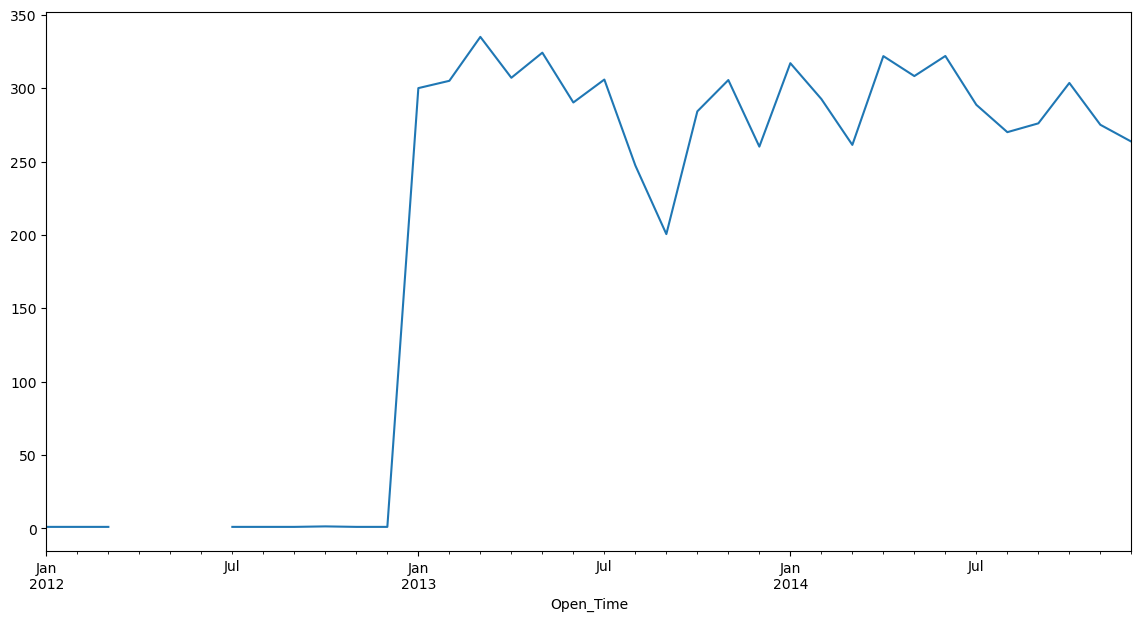

In [83]:
plt.figure(figsize=(14,7))
data1.frequency.resample('m').mean().plot()

<AxesSubplot:xlabel='Open_Time'>

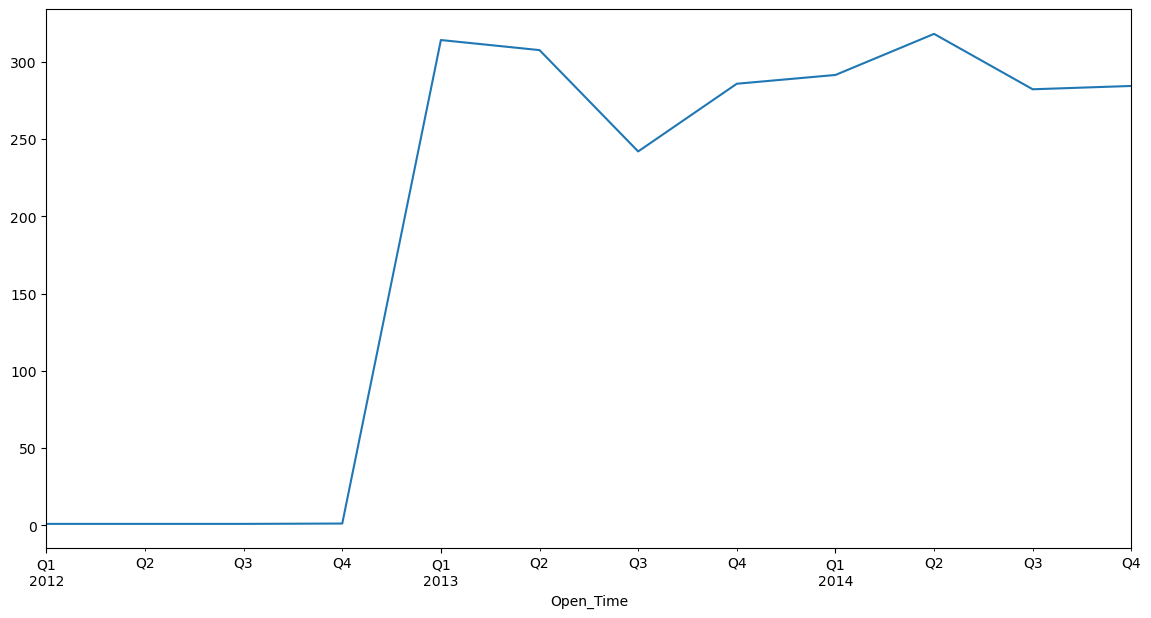

In [84]:
plt.figure(figsize=(14,7))
data1.frequency.resample('q').mean().plot()

<AxesSubplot:xlabel='Open_Time'>

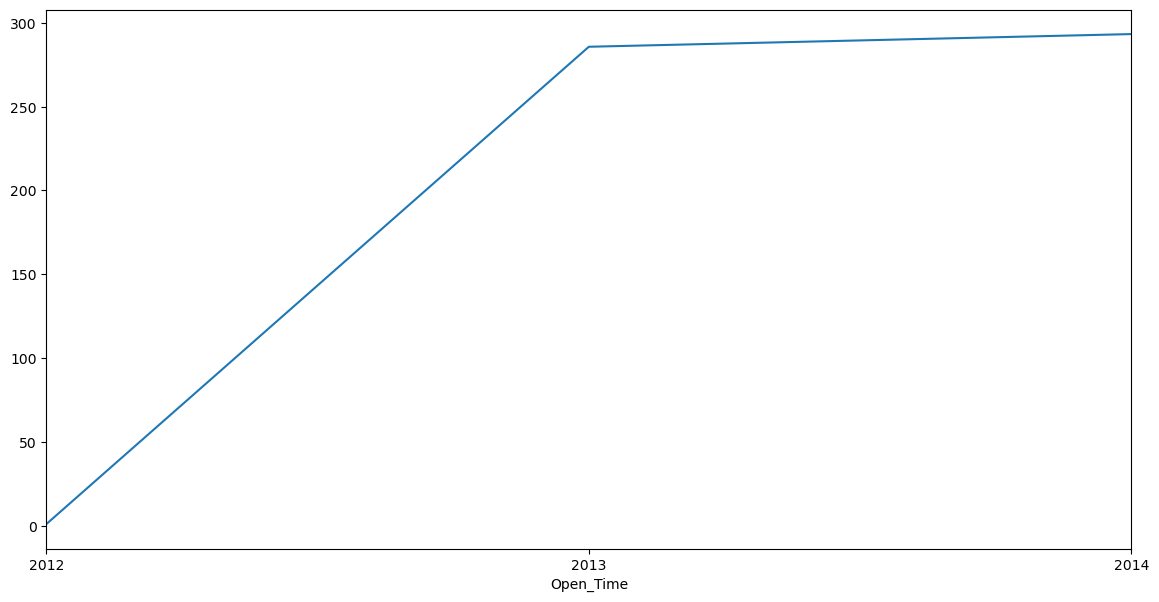

In [85]:
plt.figure(figsize=(14,7))
data1.frequency.resample('y').mean().plot()

<AxesSubplot:xlabel='Open_Time'>

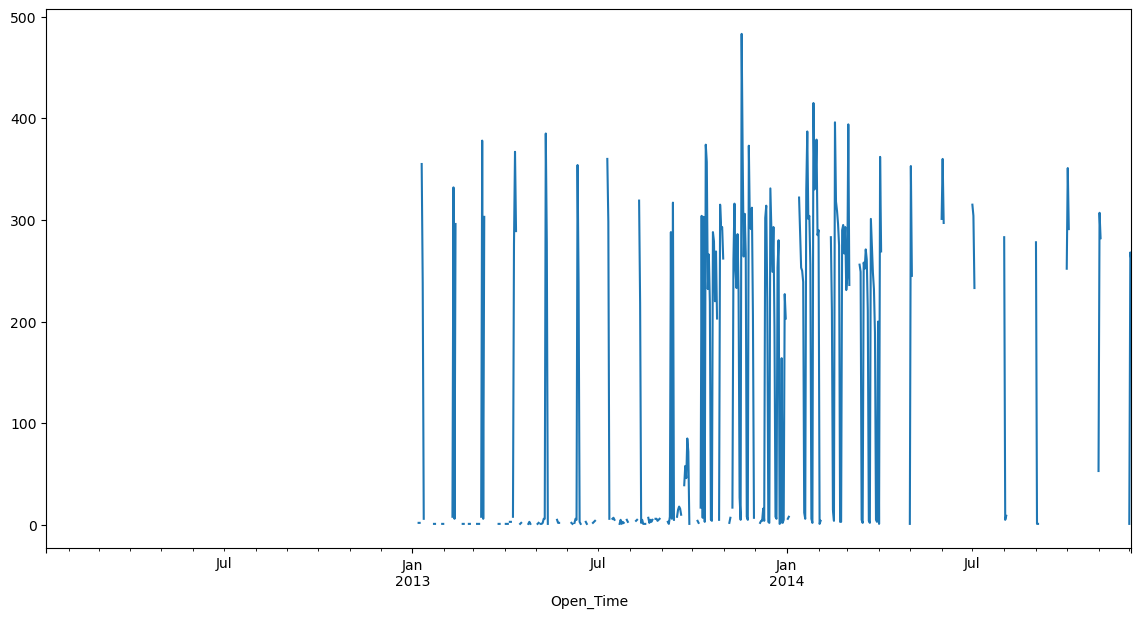

In [86]:
plt.figure(figsize=(14,7))
data1.frequency.resample('d').mean().plot()

In [87]:
ts = data1.loc[:,['frequency']]
ts.tail()

,frequency
Open_Time,
2014-12-03,260
2014-12-03,260
2014-12-03,260
2014-12-03,260
2014-12-03,260


## We are considering the data above '2013-9-1', because in below dates there are no much frequencies.

In [88]:
ts2 = ts['2013-9-1':'2014-03-31']
ts2.head()

,frequency
Open_Time,
2013-09-04,1
2013-09-07,3
2013-09-07,3
2013-09-07,3
2013-09-08,1


<AxesSubplot:xlabel='Open_Time'>

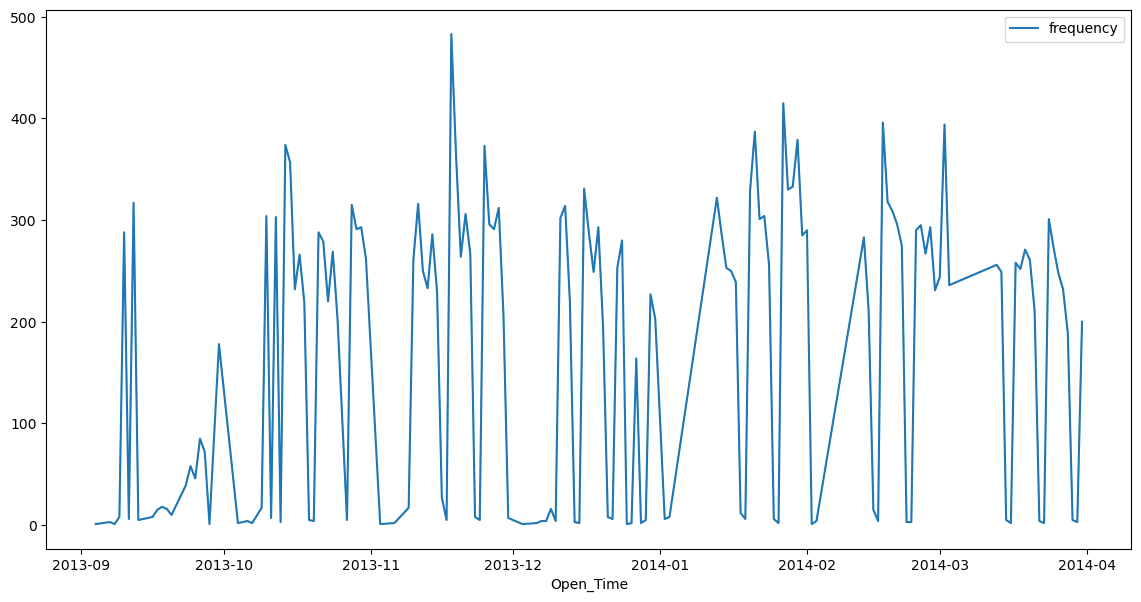

In [89]:
plt.figure(figsize=(14,7))
sns.lineplot(data=ts2)

<AxesSubplot:xlabel='Open_Time'>

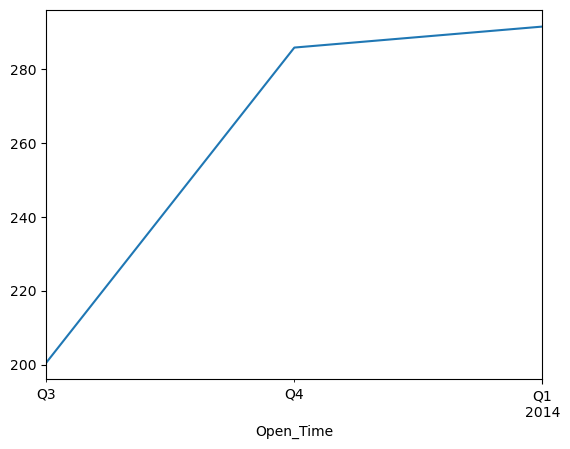

In [90]:
ts2.frequency.resample('q').mean().plot()

<AxesSubplot:xlabel='Open_Time'>

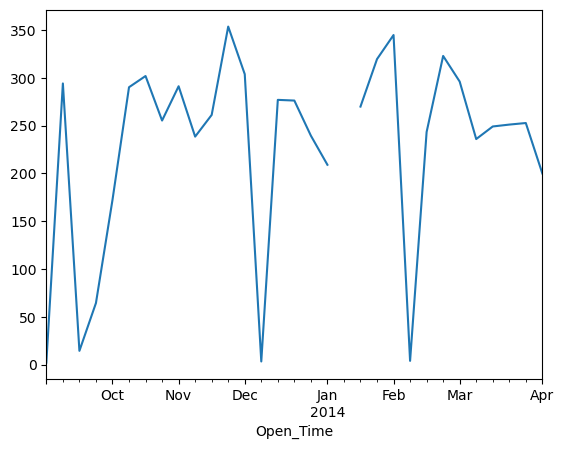

In [91]:
ts2.frequency.resample('w').mean().plot()

<AxesSubplot:xlabel='Open_Time'>

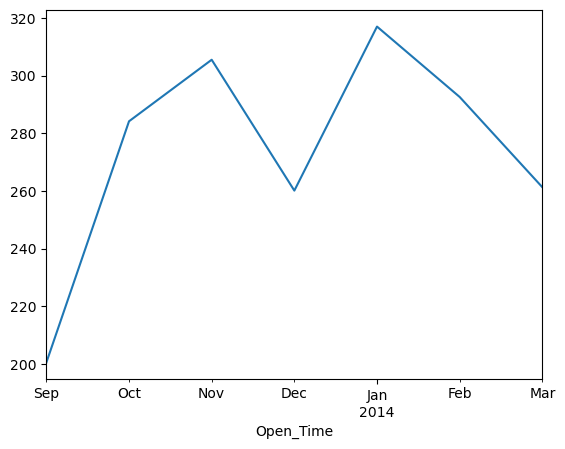

In [92]:
ts2.frequency.resample('m').mean().plot()

## Checking the data if it is stationary or not with Results of Dickey-Fuller Test

In [93]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    
    plt.figure(figsize=(14,7))
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


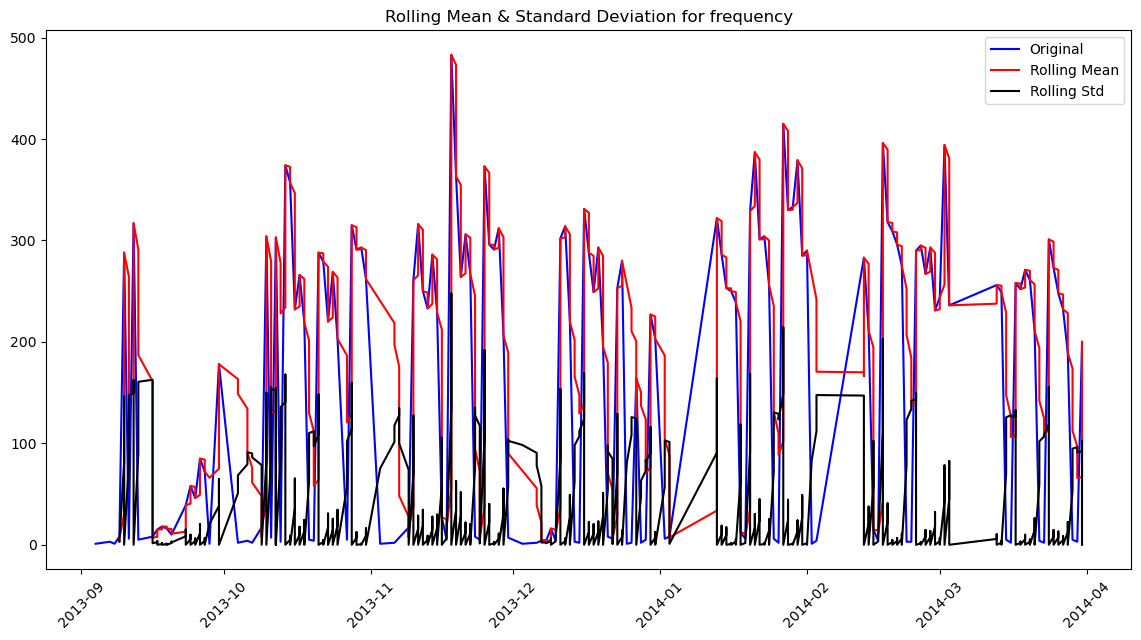

Results of Dickey-Fuller Test:
Test Statistic                -7.429239e+00
p-value                        6.425880e-11
# Lags Used                    3.800000e+01
Number of Observations Used    2.644300e+04
Critical Value (1%)           -3.430597e+00
Critical Value (5%)           -2.861649e+00
Critical Value (10%)          -2.566828e+00
dtype: float64


In [94]:
test_stationarity(ts2,ts='frequency')

## Makeing the signal Stationary

In [95]:
def plot_transformed_data(df, ts, ts_transform):
  plt.figure(figsize=(14,7))
  plt.plot(df[ts])
  
  plt.plot(df[ts_transform], color = 'green')
  plt.title('%s and %s time-series graph' %(ts, ts_transform))
  plt.tick_params(axis = 'x', rotation = 45)
  plt.legend([ts, ts_transform])
  plt.show()
  plt.close()
  
  return

In [96]:
ts2['ts_trans'] = ts2.frequency.apply(lambda x: np.log(x)) - ts2.frequency.diff()

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\2436741145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts2['ts_trans'] = ts2.frequency.apply(lambda x: np.log(x)) - ts2.frequency.diff()


In [97]:
ts2.fillna(0,inplace=True)

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\3361607523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts2.fillna(0,inplace=True)


In [98]:
ts2.value_counts()

frequency  ts_trans  
293        5.680173      876
288        5.662960      861
304        5.717028      606
301        5.707110      600
296        5.690359      590
                        ... 
232        21.446737       1
           130.446737      1
233        22.451038       1
236        163.463832      1
1          0.000000        1
Length: 244, dtype: int64

In [99]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26482 entries, 2013-09-04 to 2014-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frequency  26482 non-null  int64  
 1   ts_trans   26482 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 620.7 KB


In [100]:
ts2.ts_trans

Open_Time
2013-09-04    0.000000
2013-09-07   -0.901388
2013-09-07    1.098612
2013-09-07    1.098612
2013-09-08    2.000000
                ...   
2014-03-31    5.298317
2014-03-31    5.298317
2014-03-31    5.298317
2014-03-31    5.298317
2014-03-31    5.298317
Name: ts_trans, Length: 26482, dtype: float64

In [101]:
ts2.ts_trans=ts2.ts_trans.astype('float')

C:\Users\Bindushree\AppData\Local\Temp\ipykernel_22856\490565355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts2.ts_trans=ts2.ts_trans.astype('float')


In [102]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26482 entries, 2013-09-04 to 2014-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frequency  26482 non-null  int64  
 1   ts_trans   26482 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 620.7 KB


## Ploting the stationary and non stationary data together

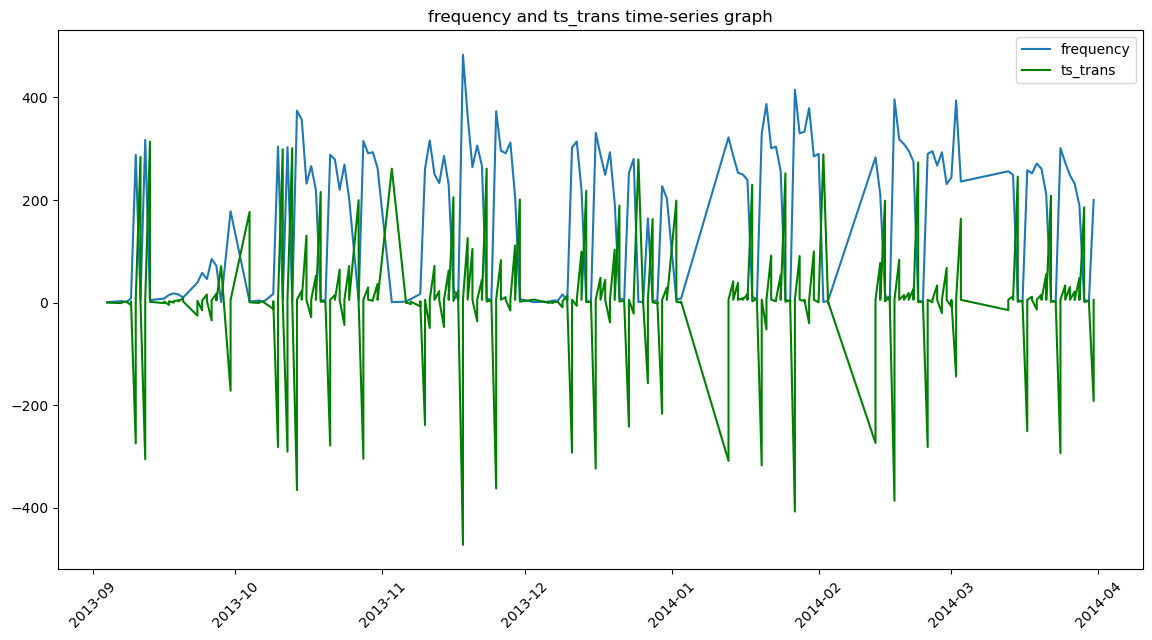

In [103]:
## transforming the data 

plot_transformed_data(ts2,ts='frequency',ts_transform='ts_trans')

## Applying ARIMA Model

In [104]:
def run_arima_model(df, ts, p, d, q):
  """
  Run ARIMA model
  """
  from statsmodels.tsa.arima.model import ARIMA
  model = ARIMA(df[ts], order=(p, d, q))  
  results_ = model.fit()  
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
  
  plt.show()
  plt.close()
  
  return results_

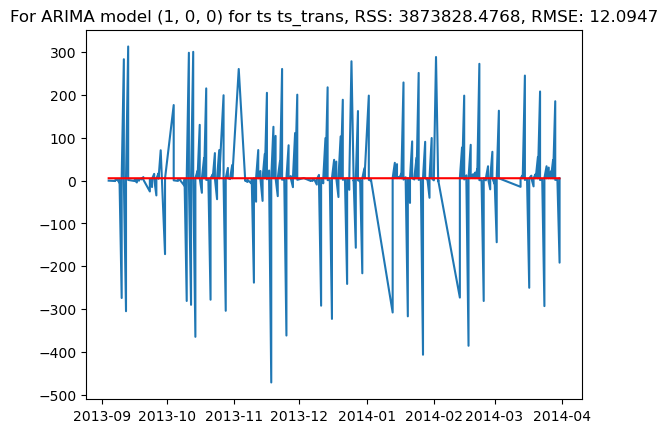

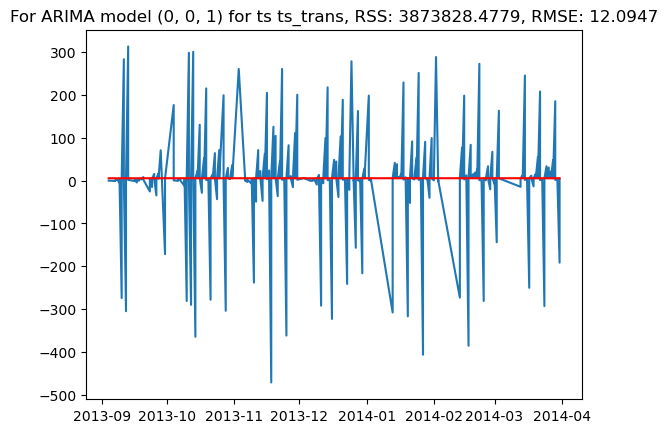

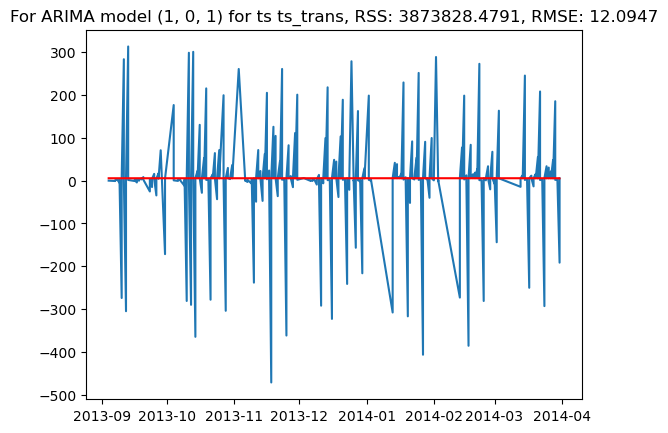

In [105]:
import warnings
warnings.filterwarnings('ignore')
model_AR = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 1, 
                           d = 0, 
                           q = 0)
model_MA = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 0, 
                           d = 0, 
                           q = 1)
model_MA = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 1, 
                           d = 0, 
                           q = 1)

In [106]:
ts.drop_duplicates(inplace=True)

In [107]:
# Since not many tickets before October 2013, we consider only the latter values
import datetime as dt
incfrom2013 = ts[ts.index > dt.datetime(2013,10,1)]

In [108]:
# new Series
data2 = incfrom2013['frequency']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-09', '2013-10-10', '2013-10-11', '2013-10-12',
               '2013-10-13', '2013-10-14', '2013-10-15', '2013-10-16',
               '2013-10-17', '2013-10-18',
               ...
               '2014-11-24', '2014-11-25', '2014-11-26', '2014-11-27',
               '2014-11-28', '2014-11-29', '2014-11-30', '2014-12-01',
               '2014-12-02', '2014-12-03'],
              dtype='datetime64[ns]', name='Open_Time', length=421, freq='D')

In [109]:
# Making a list of values for p,d & q
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [110]:
data2 = pd.to_numeric(data2, errors='coerce')

In [111]:
# Checking the AIC values per pairs
import statsmodels.api as sm
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:1119.9513808197764
ARIMA(0, 0, 1) - AIC:1064.0281727901431
ARIMA(0, 1, 0) - AIC:971.9252205785594
ARIMA(0, 1, 1) - AIC:916.3547213250748
ARIMA(1, 0, 0) - AIC:987.1186356360435
ARIMA(1, 0, 1) - AIC:919.2932309070593
ARIMA(1, 1, 0) - AIC:965.540397619873
ARIMA(1, 1, 1) - AIC:917.5540586067625


## Predicting the future values and the confidence interval

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

Open_Time
2014-03-03    297.0
2014-03-04    276.0
2014-03-05    281.0
2014-03-06    281.0
2014-03-07    281.0
              ...  
2014-10-26    275.0
2014-10-27    275.0
2014-10-28    275.0
2014-10-29    275.0
2014-10-30    275.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

## Future Prediction

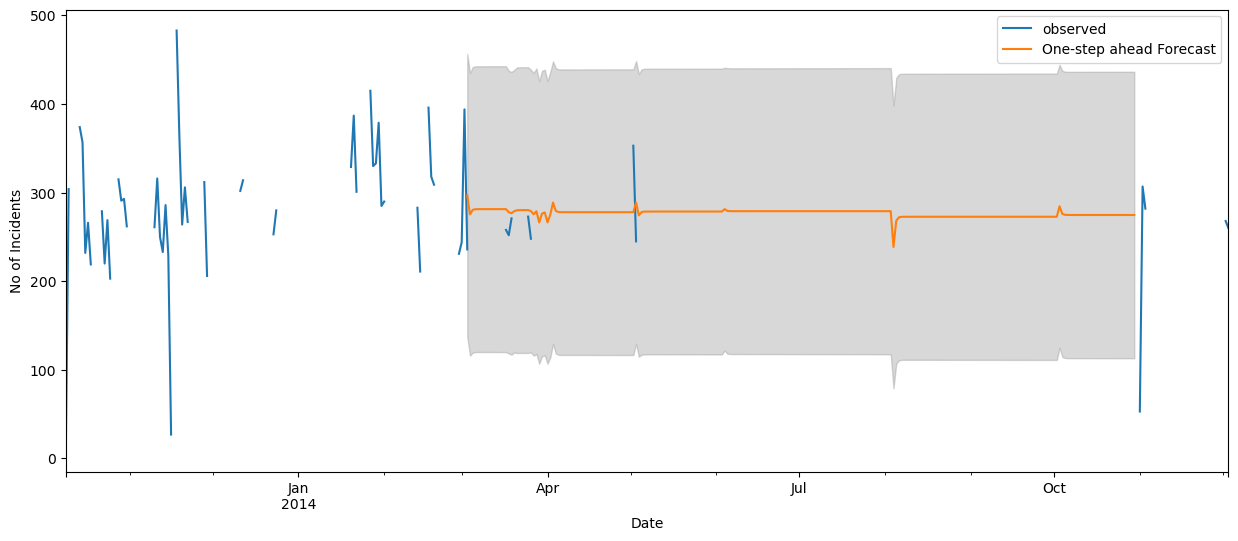

In [113]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

- In the above graph, we can observe the future prediction of No. of Incident volumes will occur.

## Businss Case 3: Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

In [114]:
data3

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,0.0,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,0.0,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,4.0,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,0.0,0.0,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,0.0,0.0,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,0.0,0.0,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,0.0,0.0,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,0.0,0.0,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,0.0,0.0,NaN


In [115]:
data3['CI_Cat'].value_counts()

application       33011
subapplication     7787
computer           3643
storage             917
hardware            915
software            333
Name: CI_Cat, dtype: int64

## Extracting the required fields.

In [116]:
data3=data3[['CI_Name','CI_Cat','CI_Subcat','Category','Priority']]
data3

,CI_Name,CI_Cat,CI_Subcat,Category,Priority
0,SUB000508,subapplication,Web Based Application,incident,4.0
1,WBA000124,application,Web Based Application,incident,3.0
2,DTA000024,application,Desktop Application,request for information,4.0
3,WBA000124,application,Web Based Application,incident,4.0
4,WBA000124,application,Web Based Application,incident,4.0
...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,incident,4.0
46602,SBA000461,application,Server Based Application,incident,4.0
46603,LAP000019,computer,Laptop,incident,5.0
46604,WBA000058,application,Web Based Application,incident,4.0


## Splitting the data into X and Y

In [117]:
X= data3.drop(['CI_Cat'],axis=1)
Y= data3['CI_Cat']

In [118]:
X.head()

,CI_Name,CI_Subcat,Category,Priority
0,SUB000508,Web Based Application,incident,4.0
1,WBA000124,Web Based Application,incident,3.0
2,DTA000024,Desktop Application,request for information,4.0
3,WBA000124,Web Based Application,incident,4.0
4,WBA000124,Web Based Application,incident,4.0


## Encoding

In [119]:
data3.Priority.value_counts()

4.0    24097
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: Priority, dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in (0,1,2):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CI_Name    46606 non-null  int32  
 1   CI_Subcat  46606 non-null  int32  
 2   Category   46606 non-null  int32  
 3   Priority   46606 non-null  float64
dtypes: float64(1), int32(3)
memory usage: 910.4 KB


In [122]:
X.head()

,CI_Name,CI_Subcat,Category,Priority
0,2741,16,1,4.0
1,2863,16,1,3.0
2,990,4,3,4.0
3,2863,16,1,4.0
4,2863,16,1,4.0


In [123]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

X_train.shape,X_test.shape

((37284, 4), (9322, 4))

In [124]:
Y_train.value_counts()

application       26372
subapplication     6241
computer           2942
hardware            735
storage             730
software            264
Name: CI_Cat, dtype: int64

In [125]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_over,Y_train_over = oversample.fit_resample(X_train.astype(float),Y_train)

In [126]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in (0,1,2):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [127]:
Y_train_over.shape

(158232,)

In [128]:
Y_train_over.value_counts()

application       26372
computer          26372
subapplication    26372
software          26372
storage           26372
hardware          26372
Name: CI_Cat, dtype: int64

In [129]:
##Model Initialization and Training

*Logistic Regression*

In [130]:
from sklearn.linear_model import LogisticRegression
lor= LogisticRegression()
lor.fit(X_train,Y_train)

LogisticRegression()

In [131]:
Y_lor= lor.predict(X_test)
Y_lor

array(['application', 'application', 'application', ..., 'application',
       'application', 'application'], dtype=object)

In [132]:
print(accuracy_score(Y_test,Y_lor))

0.6995279982836301


## SVM

In [133]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,Y_train)

In [134]:
Y_svm= rbf_svc.predict(X_test)

In [135]:
print('\nAccuracy Score :')
print('----------------\n')
print(accuracy_score(Y_test,Y_svm))
print('\nClassification Report:')
print('---------------------\n\n')
print(classification_report(Y_test,Y_svm))


Accuracy Score :
----------------

0.9993563612958593

Classification Report:
---------------------


                precision    recall  f1-score   support

   application       1.00      1.00      1.00      6639
      computer       1.00      1.00      1.00       701
      hardware       1.00      0.99      1.00       180
      software       1.00      0.97      0.99        69
       storage       0.99      0.99      0.99       187
subapplication       1.00      1.00      1.00      1546

      accuracy                           1.00      9322
     macro avg       1.00      0.99      1.00      9322
  weighted avg       1.00      1.00      1.00      9322



## RandomForest Classifier

In [136]:
model_rfc = RandomForestClassifier(random_state=100).fit(X_train_over,Y_train_over)
Y_rfc = model_rfc.predict(X_test)

print('%% The score for {} is {} %%'.format(model_rfc,model_rfc.score(X,Y)))

print('\nConfusion Matrix :')
print('----------------\n')
print(confusion_matrix(Y_test,Y_rfc))
print('\nClassification Report:')
print('---------------------\n\n')
print(classification_report(Y_test,Y_rfc))

%% The score for RandomForestClassifier(random_state=100) is 0.9999570870703343 %%

Confusion Matrix :
----------------

[[6639    0    0    0    0    0]
 [   0  701    0    0    0    0]
 [   0    0  180    0    0    0]
 [   0    0    0   69    0    0]
 [   0    1    0    0  186    0]
 [   0    1    0    0    0 1545]]

Classification Report:
---------------------


                precision    recall  f1-score   support

   application       1.00      1.00      1.00      6639
      computer       1.00      1.00      1.00       701
      hardware       1.00      1.00      1.00       180
      software       1.00      1.00      1.00        69
       storage       1.00      0.99      1.00       187
subapplication       1.00      1.00      1.00      1546

      accuracy                           1.00      9322
     macro avg       1.00      1.00      1.00      9322
  weighted avg       1.00      1.00      1.00      9322



In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_rfc)

0.9997854537652864

## KNN

In [138]:
model_knn = KNeighborsClassifier().fit(X_train_over,Y_train_over)
Y_knn = model_knn.predict(X_test)

#print('%% The score of {} is {} %%'.format(model_knn,model_knn.score(X,Y)))

print('\nConfusion Matrix :\n----------------\n\n',confusion_matrix(Y_test,Y_knn))
print('\nClassification Report:\n---------------------\n\n',classification_report(Y_test,Y_knn))


Confusion Matrix :
----------------

 [[6638    0    0    1    0    0]
 [   0  701    0    0    0    0]
 [   0    0  180    0    0    0]
 [   0    0    0   69    0    0]
 [   0    1    0    0  186    0]
 [   1    0    0    0    0 1545]]

Classification Report:
---------------------

                 precision    recall  f1-score   support

   application       1.00      1.00      1.00      6639
      computer       1.00      1.00      1.00       701
      hardware       1.00      1.00      1.00       180
      software       0.99      1.00      0.99        69
       storage       1.00      0.99      1.00       187
subapplication       1.00      1.00      1.00      1546

      accuracy                           1.00      9322
     macro avg       1.00      1.00      1.00      9322
  weighted avg       1.00      1.00      1.00      9322



In [139]:
accuracy_score(Y_test,Y_knn)

0.9996781806479297

## ANN

In [140]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,Y_train)

MLPClassifier()

In [141]:
Y_ann= model_mlp.predict(X_test)

In [142]:
print(accuracy_score(Y_test,Y_ann))

0.7126153186011586


#Accuracy Report:

1.Logistic Regression : 0.69
    
2.SVM : 0.99
    
3.KNN : 0.99
    
4.RandomForest Classifier : 0.99
    
5.ANN : 0.72
    
From above report ,we can say that SVM,KNN and RandomForest Classifer algorithms give good accuracy.

## Business Case 4: Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets

In [143]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  46606 non-null  int64  
 1   CI_Name                     46606 non-null  object 
 2   CI_Cat                      46495 non-null  object 
 3   CI_Subcat                   46495 non-null  object 
 4   WBS                         46606 non-null  object 
 5   Incident_ID                 46606 non-null  object 
 6   Status                      46606 non-null  object 
 7   Impact                      46606 non-null  object 
 8   Urgency                     46606 non-null  object 
 9   Priority                    45226 non-null  float64
 10  number_cnt                  46606 non-null  float64
 11  Category                    46606 non-null  object 
 12  KB_number                   46606 non-null  object 
 13  Alert_Status                466

In [145]:
##We cannot solve Business Case 4, as the data is insufficient.